In [24]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
df_07_13 = pd.read_csv("../data/Spreadsheet/2017-07-13.csv")
df_08_03 = pd.read_csv("../data/Spreadsheet/2017-08-03.csv")

In [4]:
df_07_13.head()

,SPAD,NDVI,WP
0,53.10,0.747920,-6.37
1,9.05,0.299633,-10.36
2,72.91,0.805075,-5.38
3,12.00,0.438770,-15.39
4,80.49,0.900775,-5.48


In [5]:
ndvi = df_07_13["NDVI"].as_matrix()
wp = df_07_13["WP"].as_matrix()
ndvi = np.concatenate((ndvi, df_08_03["NDVI"].as_matrix()))
wp = np.concatenate((wp, df_08_03["WP"].as_matrix()))

In [6]:
stats.pearsonr(wp, ndvi)

(0.76446084154427651, 8.7659657162102661e-07)

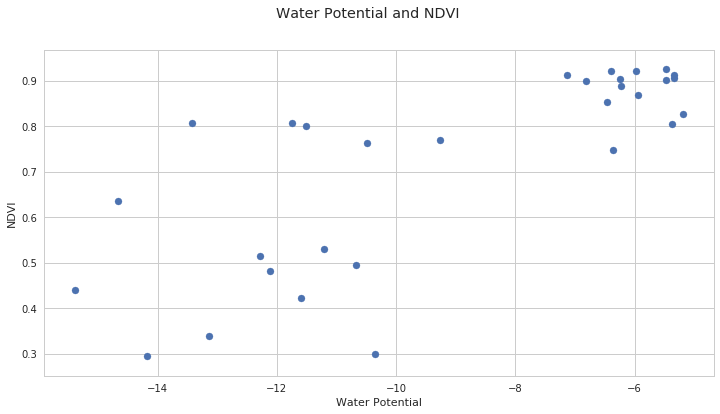

In [7]:
fig = plt.figure()
plt.scatter(wp, ndvi)
fig.suptitle("Water Potential and NDVI")
plt.ylabel("NDVI")
plt.xlabel("Water Potential")

# Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(ndvi.reshape(-1, 1), wp, test_size=0.15)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 2.24290054509


In [12]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 1.66747614885


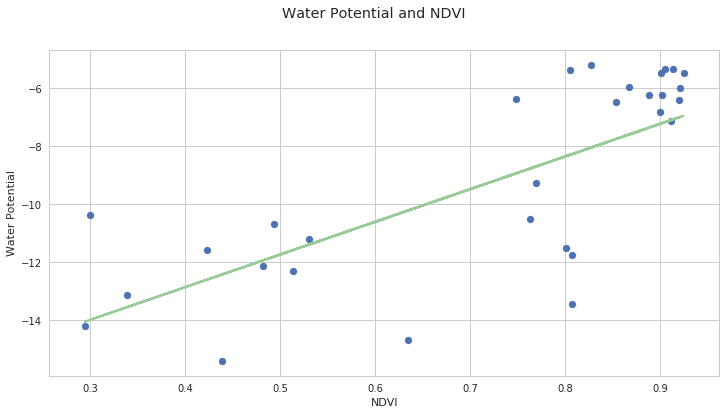

In [13]:
fig = plt.figure()
plt.scatter(ndvi, wp)
plt.plot(ndvi, model.predict(ndvi.reshape(-1, 1)), color="#99CC99", linewidth=2)
fig.suptitle("Water Potential and NDVI")
plt.xlabel("NDVI")
plt.ylabel("Water Potential")

# Polynomial Regression

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [15]:
model = Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 2.00658441028


In [16]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 1.51281988129


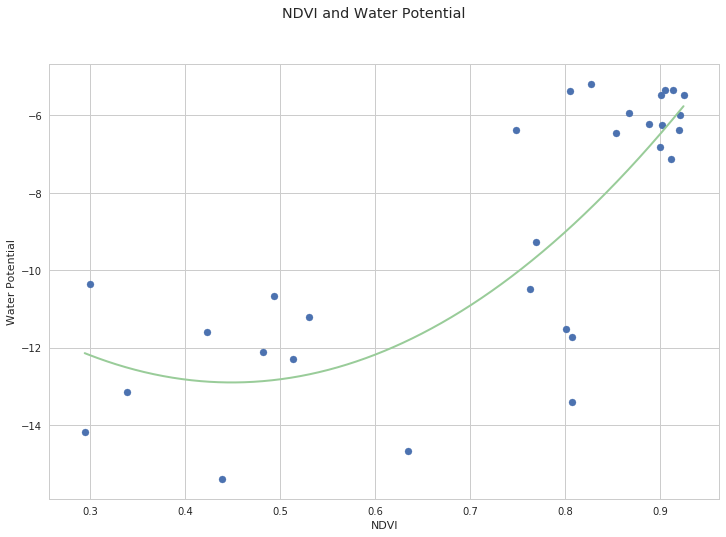

In [26]:
fig = plt.figure()
plt.scatter(ndvi, wp)
datax_os = np.linspace(np.max(ndvi), np.min(ndvi), 1024)
plt.plot(datax_os, model.predict(datax_os.reshape(-1,1)), color="#99CC99", linewidth=2) # 'smoother' line
fig.suptitle("NDVI and Water Potential")
plt.xlabel("NDVI")
plt.ylabel("Water Potential")

In [23]:
np.max(wp), np.min(wp)

(-5.1900000000000004, -15.390000000000001)